In [115]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Data Loading

In [116]:
dataset = pd.read_csv("homeprices_banglore.csv")
dataset.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


# Data Preprocessing

### Scaling

In [117]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()
sx.fit(dataset[['area','bedrooms']])
sy.fit(dataset['price'].values.reshape(-1,1))

def split_train_test(dataset,TRAIN_RATIO):
    xy_train = dataset[:int(TRAIN_RATIO*dataset.shape[0])]
    xy_test = dataset[int(TRAIN_RATIO*dataset.shape[0]):]
    '''fit_transform does two things:
    --> fit: Learn from the data (like computing the mean, standard deviation, min, max, etc.).
    --> transform: Apply the scaling to the data.'''

    x_train = sx.transform(xy_train.drop('price',axis="columns"))
    
    '''taking values of 'prices' column, reshaping into 2D nparray as sy takes 2D input shape'''
    y_train = sy.transform(xy_train['price'].values.reshape(-1,1)) # -1 means all rows

    x_test = xy_test.drop('price',axis="columns").values
    y_test = xy_test['price'].values.reshape(-1,1)
    
    return x_train,y_train,x_test,y_test


In [118]:
x_train,y_train,x_test,y_test=split_train_test(dataset=dataset,TRAIN_RATIO=0.8)

In [119]:
def forward_pass(x, weights, bias):
    y_pred = np.dot(weights,x.T)+bias
    y_pred = y_pred.reshape(-1,1)
    return y_pred

def MeanSquareError(y_true, y_pred):
    return np.mean(np.square(y_true-y_pred))
    
def derivative(x, y_true, y_pred):
    total_samples=x.shape[0]
    dw = -(2/total_samples)*(x.T.dot(y_true - y_pred))
    db = -(2/total_samples)*np.sum(y_true-y_pred)
    return dw , db

def adjustWeight(weights, bias, dw, db, learning_rate):
    weights = weights - learning_rate*dw[:,0]
    bias = bias - learning_rate*db
    return weights, bias

def predict(x,weights,bias):
    scaled_X = sx.fit_transform(x)
    pred = forward_pass(scaled_X,weights,bias)
    pred = sy.inverse_transform(pred)
    return pred
    

def batch_gradient_descent(x,y_true,learning_rate,epoch):
    number_of_features = x.shape[1] #number of colums are the features
    weights=np.ones(shape=(number_of_features))
    bias = 0

    history = {'loss' : [], 'Epoch' : []}
    for i in range(epoch):
        y_pred = forward_pass(x, weights, bias)
        loss = MeanSquareError(y_true,y_pred)
        dw,db=derivative(x,y_true,y_pred)
        weights, bias = adjustWeight(weights, bias, dw, db, learning_rate)
        
        if (i+1) % 100 == 0:
            print(f" Epoch {i+1}: loss: {loss}, weights: {weights}, bias: {bias}")
            history['loss'].append(loss)
            history['Epoch'].append(i)
    return history, [weights, bias]

In [120]:
history, parameters = batch_gradient_descent(x_train,y_train,0.5,5000)

 Epoch 100: loss: 0.002374644059725611, weights: [0.72308231 0.50790426], bias: -0.14336816592087737
 Epoch 200: loss: 0.0020040255849647346, weights: [0.80493708 0.40274031], bias: -0.12129630884128616
 Epoch 300: loss: 0.001820301797773329, weights: [0.8625739  0.32869998], bias: -0.10575976408483084
 Epoch 400: loss: 0.0017292258441164647, weights: [0.90315457 0.27657001], bias: -0.09482086526374281
 Epoch 500: loss: 0.001684077475136539, weights: [0.93172642 0.23986658], bias: -0.08711905572632886
 Epoch 600: loss: 0.0016616964278929666, weights: [0.95184315 0.2140246 ], bias: -0.08169640111357483
 Epoch 700: loss: 0.0016506016466852193, weights: [0.96600685 0.1958299 ], bias: -0.07787844341072862
 Epoch 800: loss: 0.0016451017177181691, weights: [0.97597916 0.18301946], bias: -0.0751903133228493
 Epoch 900: loss: 0.0016423752810200355, weights: [0.98300042 0.17399994], bias: -0.07329766706226452
 Epoch 1000: loss: 0.0016410237259156927, weights: [0.98794392 0.16764952], bias: -0.0

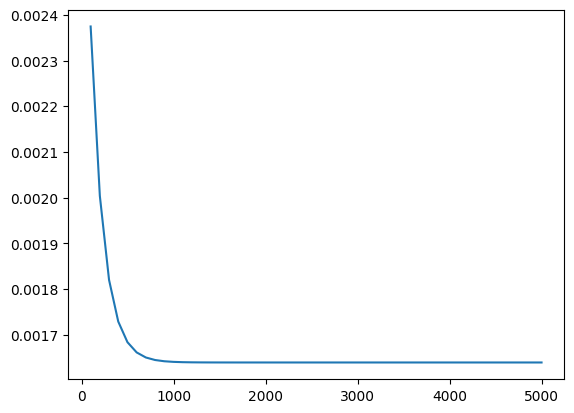

In [121]:
plt.xlabel = "Epoch"
plt.ylabel = "Loss"
plt.plot(history['Epoch'],history['loss'])

In [122]:
parameters

[array([0.99970567, 0.15254036]), np.float64(-0.06879461153890812)]

In [123]:
predict(x_test,parameters[0],parameters[1])

array([[ 69.33862071],
       [ 94.00141026],
       [178.26594124],
       [ 22.71272744]])

In [124]:
y_test

array([[ 48.],
       [ 60.],
       [102.],
       [ 32.]])